<a href="https://colab.research.google.com/github/Sireesha024/CS59000_06_Ethical_Artificial_Intelligence/blob/main/Copy_of_Ethical_AI_ProjectUpdate2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kagglehub

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thovylnguyn/fakenewscorpus-full")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fakenewscorpus-full


In [18]:
import pandas as pd
df = pd.read_csv("/kaggle/input/fakenewscorpus-full/news_cleaned_big.csv")

<ipython-input-18-9a1aa3755189>:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/fakenewscorpus-full/news_cleaned_big.csv")


In [19]:
df.head()

,Unnamed: 0,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
0,0,2,express.co.uk,rumor,https://www.express.co.uk/news/science/738402/...,"Life is an illusion, at least on a quantum lev...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Is life an ILLUSION? Researchers prove 'realit...,Sean Martin,NaN,[''],THE UNIVERSE ceases to exist when we are not l...,NaN,NaN,NaN
1,1,6,barenakedislam.com,hate,http://barenakedislam.com/category/donald-trum...,"Unfortunately, he hasn’t yet attacked her for ...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Donald Trump,"Linda Rivera, Conrad Calvano, Az Gal, Lincoln ...",NaN,[''],NaN,NaN,NaN,NaN
2,2,7,barenakedislam.com,hate,http://barenakedislam.com/category/donald-trum...,The Los Angeles Police Department has been den...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Donald Trump,"Linda Rivera, Conrad Calvano, Az Gal, Lincoln ...",NaN,[''],NaN,NaN,NaN,NaN
3,3,8,barenakedislam.com,hate,http://barenakedislam.com/2017/12/24/more-winn...,The White House has decided to quietly withdra...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,"MORE WINNING! Israeli intelligence source, DEB...","Cleavis Nowell, Cleavisnowell, Clarence J. Fei...",NaN,[''],NaN,NaN,NaN,NaN
4,4,9,barenakedislam.com,hate,http://barenakedislam.com/2017/12/25/oh-trump-...,“The time has come to cut off the tongues of t...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,"“Oh, Trump, you coward, you just wait, we will...","F.N. Lehner, Don Spilman, Clarence J. Feinour,...",NaN,[''],NaN,NaN,NaN,NaN


In [20]:
columns_to_drop = [
    'Unnamed: 0', 'id', 'url', 'scraped_at', 'inserted_at', 'updated_at', 'meta_keywords', 'source', 'authors', 'keywords','meta_description', 'tags','summary'
]

In [21]:
# Drop the unnecessary columns
df = df.drop(columns=columns_to_drop)


In [22]:
df.head()

,domain,type,content,title
0,express.co.uk,rumor,"Life is an illusion, at least on a quantum lev...",Is life an ILLUSION? Researchers prove 'realit...
1,barenakedislam.com,hate,"Unfortunately, he hasn’t yet attacked her for ...",Donald Trump
2,barenakedislam.com,hate,The Los Angeles Police Department has been den...,Donald Trump
3,barenakedislam.com,hate,The White House has decided to quietly withdra...,"MORE WINNING! Israeli intelligence source, DEB..."
4,barenakedislam.com,hate,“The time has come to cut off the tongues of t...,"“Oh, Trump, you coward, you just wait, we will..."


In [23]:
unique_targets = df['type'].unique()
unique_targets

array(['rumor', 'hate', 'unreliable', 'conspiracy', 'clickbait', 'satire',
       'fake', 'reliable', 'bias', 'political', 'junksci', nan, 'unknown',
       '2018-02-02 01:19:41.756664', '2018-02-07 23:39:33.852696',
       '2017-11-10T11:18:44.524042', '2018-02-08 19:18:34.468066',
       ' including Iraq', '2018-02-08 19:18:34.468038',
       '” said Linton Roberts', '2018-02-10 13:43:39.521661'],
      dtype=object)

In [25]:
relevant_labels = ['fake', 'reliable','bias','conspiracy','clickbait','unreliable']

# Filter the dataset to keep only rows with relevant labels
df_filtered = df[df['type'].isin(relevant_labels)]

# Check the updated unique target variables
print("Updated unique target variables:")
print(df_filtered['type'].unique())

# Check the frequency of each remaining target variable
print("\nFrequency of each target variable:")
print(df_filtered['type'].value_counts())


Updated unique target variables:
['unreliable' 'conspiracy' 'clickbait' 'fake' 'reliable' 'bias']

Frequency of each target variable:
type
reliable      1913222
bias          1138998
fake           894746
conspiracy     831235
unreliable     298784
clickbait      231949
Name: count, dtype: int64


In [26]:
df.to_csv('FakeNewsCorpus_5classes.csv', index=False)

In [27]:
nan_rows = df[df.isna().any(axis=1)]

# Display the NaN rows
print("Rows with NaN values:")
print(nan_rows)

# Count the number of NaN rows
print("\nNumber of NaN rows:", len(nan_rows))

Rows with NaN values:
                                 domain                        type  \
397                     www.cnsnews.com                         NaN   
663                      freebeacon.com                         NaN   
664                      freebeacon.com                         NaN   
3097               www.greenmedinfo.com                         NaN   
3098               www.greenmedinfo.com                         NaN   
...                                 ...                         ...   
9977557   2016-11-14T21:16:20.914+02:00  2018-02-10 13:43:39.521661   
9985384                     www.cnn.com                    reliable   
9991838                     www.cnn.com                    reliable   
10002694                www.reuters.com                    reliable   
10002695  2016-11-17T20:50:20.601+02:00  2018-02-10 13:43:39.521661   

                                                    content  \
397       Sen. Dick Durbin (D-Ill.) (Screenshot of C-SPA...   

In [28]:
# Drop rows with NaN values in any column
df_filtered = df.dropna()

# Check if any NaN rows remain
print("Number of NaN rows after dropping:", df_filtered.isna().sum().sum())

Number of NaN rows after dropping: 0


In [29]:
df_filtered.head()

,domain,type,content,title
0,express.co.uk,rumor,"Life is an illusion, at least on a quantum lev...",Is life an ILLUSION? Researchers prove 'realit...
1,barenakedislam.com,hate,"Unfortunately, he hasn’t yet attacked her for ...",Donald Trump
2,barenakedislam.com,hate,The Los Angeles Police Department has been den...,Donald Trump
3,barenakedislam.com,hate,The White House has decided to quietly withdra...,"MORE WINNING! Israeli intelligence source, DEB..."
4,barenakedislam.com,hate,“The time has come to cut off the tongues of t...,"“Oh, Trump, you coward, you just wait, we will..."


In [30]:
# Count the number of fake and reliable records
fake_count = df[df['type'] == 'fake'].shape[0]
reliable_count = df[df['type'] == 'reliable'].shape[0]

# Print the results
print(f"Total Fake Samples: {fake_count}")
print(f"Total Reliable Samples: {reliable_count}")

Total Fake Samples: 894746
Total Reliable Samples: 1913222


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [35]:
relevant_labels = ['fake', 'reliable','bias','conspiracy','clickbait','unreliable']

# Filter the dataset to keep only rows with relevant labels
df_filtered = df[df['type'].isin(relevant_labels)]

# Check the updated unique target variables
print("Updated unique target variables:")
print(df_filtered['type'].unique())

# Check the frequency of each remaining target variable
print("\nFrequency of each target variable:")
print(df_filtered['type'].value_counts())


Updated unique target variables:
['unreliable' 'conspiracy' 'clickbait' 'fake' 'reliable' 'bias']

Frequency of each target variable:
type
reliable      1913222
bias          1138998
fake           894746
conspiracy     831235
unreliable     298784
clickbait      231949
Name: count, dtype: int64


<ipython-input-36-07f5ea4ab3da>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df_filtered, palette='viridis')


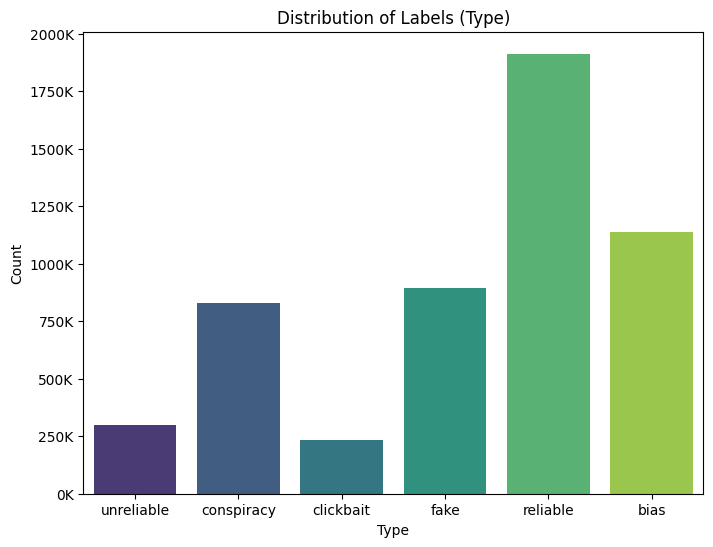

In [36]:
# Distribution of labels (type)
def format_thousands(x, _):
    return f'{int(x/1000)}K'  # Convert to 'K' format

# Plot distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df_filtered, palette='viridis')
plt.title('Distribution of Labels (Type)')
plt.xlabel('Type')
plt.ylabel('Count')

# Apply the custom y-axis formatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_thousands))

plt.show()

In [37]:
df_filtered.head()
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5308934 entries, 6 to 11558722
Data columns (total 4 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   domain   object
 1   type     object
 2   content  object
 3   title    object
dtypes: object(4)
memory usage: 202.5+ MB


In [38]:
# Using len() to count the rows
num_rows = len(df_filtered)

# Or using the .shape attribute
num_rows = df_filtered.shape[0]

print(f'The number of rows is: {num_rows}')


The number of rows is: 5308934


In [41]:
df_filtered.head()

,domain,type,content,title
6,blackagendareport.com,unreliable,UN-Backed Police Massacred Haitians With Impun...,UN-Backed Police Massacred Haitians With Impunity
7,blackagendareport.com,unreliable,It should have come as no surprise that the sa...,Black Agenda Report
8,blackagendareport.com,unreliable,"“When the police finally left the campus, arou...",Black Agenda Report
9,blackagendareport.com,unreliable,Zambia Must Clarify Whether It Will Host Israe...,Zambia Must Clarify Whether It Will Host Israe...
10,blackgenocide.org,conspiracy,\n\n\n\n\n\n\n\nRev Dr. Childress is available...,BlackGenocide.org


In [42]:
df_filtered = df.dropna()

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# 1. Split the dataset into training and testing sets
X = df_filtered[['domain','title', 'content']]  # Features (raw text from 'domain' and 'content' columns)
y = df_filtered['type']                 # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Convert text to TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = tfidf.fit_transform(X_train['content'])
X_test_tfidf = tfidf.transform(X_test['content'])

# 3. Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# 4. Evaluate the model
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7687886242744588

Classification Report:
                            precision    recall  f1-score   support

            including Iraq       1.00      1.00      1.00      8906
2017-11-10T11:18:44.524042       0.99      1.00      1.00      2816
2018-02-08 19:18:34.468038       1.00      1.00      1.00      8105
                      bias       0.69      0.67      0.68    227028
                 clickbait       0.62      0.39      0.47     46119
                conspiracy       0.65      0.64      0.65    151976
                      fake       0.78      0.74      0.76    179496
                      hate       0.82      0.47      0.60     15412
                   junksci       0.64      0.50      0.56     23425
                 political       0.74      0.86      0.80    483457
                  reliable       0.87      0.90      0.88    382871
                     rumor       0.84      0.86      0.85     96896
                    satire       0.70      0.37      0.48     

In [ ]:
def predict_news(domain, title, content, model, tfidf):
    # Combine input text
    combined_text = domain + " " + title + " " + content

    # Convert to TF-IDF features
    text_tfidf = tfidf.transform([combined_text])

    # Make prediction
    prediction = model.predict(text_tfidf)[0]

    return prediction

# Example usage
domain = "theguardian.com"
title = "Tesla backer says Musk must reduce Trump work, as 46,000 Cybertrucks recalled"
content = "Tesla and Elon Musk are embroiled in a “brand tornado crisis moment” and the electric carmaker’s chief executive needs to cut back on his work for Donald Trump to stem the damage, one of the company’s biggest supporters has said.The warning came as Tesla announced a recall of 46,000 Cybertrucks in the US on Thursday to fix an exterior panel that could detach while driving.On Wednesday, protesters said they were planning what they described as their biggest day of action yet against the EV maker, with 500 demonstrations expected at Tesla showrooms around the world on 29 March.It also emerged that the Vancouver International Auto Show has removed Tesla from its event hours, citing security concerns."

predicted_label = predict_news(domain, title, content, model, tfidf)
print("Predicted Type:", predicted_label)

Predicted Type: conspiracy


In [ ]:
def predict_news(domain, title, content, model, tfidf):
    # Combine input text
    combined_text = domain + " " + title + " " + content

    # Convert to TF-IDF features
    text_tfidf = tfidf.transform([combined_text])

    # Make prediction
    prediction = model.predict(text_tfidf)[0]

    return prediction

# Example usage
domain = "wane.com"
title = "Summer prices have hit the pumps!"
content = "FORT WAYNE, Ind. (WANE) – You may have noticed a jump in gas prices on Tuesday and Wednesday.Many gas stations in the Summit City have hiked up to $3.29 as of Wednesday. Patrick De Haan, head of petroleum analysis with GasBuddy, said this is normal for a price cycle in the spring time. This cycle was a $0.20 increase over the last, which he attributes to their switch to “summer gasoline”.Stations began using summer gasoline on Monday, which De Haan said is more expensive than winter gasoline. Gasoline used in the winter has more butane, which is plentiful and cheap, bringing down gas prices. Butane has a low boiling point, which means it starts to evaporate more and more with warmer weather.This results in ground-level ozone pollution which is harmful to humans and the environment. Butane’s high vapor pressure makes its use in gasoline blends mostly seasonal to lessen gasoline emissions."

predicted_label = predict_news(domain, title, content, model, tfidf)
print("Predicted Type:", predicted_label)

Predicted Type: conspiracy


In [ ]:
def predict_news(domain, title, content, model, tfidf):
    # Combine input text
    combined_text = domain + " " + title + " " + content

    # Convert to TF-IDF features
    text_tfidf = tfidf.transform([combined_text])

    # Make prediction
    prediction = model.predict(text_tfidf)[0]

    return prediction

domain = "worldhealthupdate.com"
title = "New Study Finds Herbal Tea Cures Diabetes in 2 Weeks"
content = ("A groundbreaking study conducted by independent researchers claims that a rare herbal tea found in the Amazon "
           "completely eliminates diabetes within just 14 days. Scientists are shocked by the results, and pharmaceutical companies "
           "are trying to suppress this information. The study, which has not yet been published in peer-reviewed journals, "
           "suggests that regular consumption of this tea can naturally balance blood sugar levels without the need for medication.")

predicted_label = predict_news(domain, title, content, model, tfidf)
print("Predicted Type:", predicted_label)


Predicted Type: conspiracy


In [ ]:
def predict_news(domain, title, content, model, tfidf):
    # Combine input text
    combined_text = domain + " " + title + " " + content

    # Convert to TF-IDF features
    text_tfidf = tfidf.transform([combined_text])

    # Make prediction
    prediction = model.predict(text_tfidf)[0]

    return prediction

domain = "economicinsightsdaily.com"
title = "Experts Warn: US Dollar to Be Replaced by Cryptocurrency in 2025"
content = ("Financial experts have issued an urgent warning that the US dollar may soon be replaced by a new government-backed "
           "cryptocurrency as early as 2025. Insiders claim that secret meetings between global economic leaders are already discussing "
           "the transition, which could dramatically impact savings accounts, retirement funds, and the entire banking system. "
           "While officials deny these claims, leaked documents suggest that a shift toward a digital-only currency is inevitable.")

predicted_label = predict_news(domain, title, content, model, tfidf)
print("Predicted Type:", predicted_label)



Predicted Type: conspiracy
